## Simple Linear Regression
Suppose, we are given a set of 2-D points ${(x_1,y_1),(x_2,y_2) ..(x_n,y_n)}$ as shown below and we would like to approximate these points by a straight line, we can use **[linear regression](https://en.wikipedia.org/wiki/Linear_regression)**. As we know, any straight line is of the form $f(x) =  w_1 x + w_0$ (slope-intercept form). To fit such a line on the given points, we just have to find appropriate values for $w_0$ and $w_1$. This can be done using **gradient descent**. Take a look at **[this](https://github.com/rajcscw/minimalistic-ml/blob/master/gradient-descent/gradient-descent.ipynb)** if you are not familiar with it. But, keep in mind that gradient descent requires an objective function to be minimized. In linear regression, that objective function is the quality of fit of the line to the data points. This quality can be measured in terms of squared error between the actual value and the value fitted using the line. It is generally known as **squared loss** and denoted by $L$. The loss $L_i$ for each point $x_i$ is defined as

\begin{equation}
L_i = (f(x_i) - y_i)^2
\end{equation}
where $f(x_i)$ is the fitted value and $y_i$ is the actual value for the point $x_i$.

<img src="https://github.com/rajcscw/minimalistic-ml/blob/master/simple-linear-regression/points.svg" alt="Points" width="30%"/>

In gradient descent, we start with random values for $w_0$ and $w_1$. Then, we make small adjustments to them iteratively to minimize the loss. The update equations are simple:

\begin{equation}
w_0 = w_0 - \eta \nabla_{w_0} \\\
w_1 = w_1 - \eta \nabla_{w_1}
\end{equation}

The $\nabla_{w_0}$ and $\nabla_{w_1}$ are the partial derivates of $L_i$ w.r.t to $w_0$ and $w_1$ respectively. 

\begin{align}
\nabla_{w_0}  & = \frac{\partial L_i}{\partial w_0} = \frac{\partial}{\partial w_0} (f(x_i) - y_i)^2\\\
&= 2 (f(x_i) - y_i )\frac{\partial}{\partial w_0} (f(x_i) - y_i) \\\
&= 2 (f(x_i) - y_i )\frac{\partial}{\partial w_0} ( w_1 x_i + w_0- y_i) \\\
&= 2 (f(x_i) - y_i )  ( 0 + 1 - 0 ) \\\
&= 2 (f(x_i) - y_i )
\end{align}


\begin{align}
\nabla_{w_1}  & = \frac{\partial L_i}{\partial w_1} = \frac{\partial}{\partial w_1} (f(x_i) - y_i)^2\\\
&= 2 (f(x_i) - y_i )\frac{\partial}{\partial w_1} (f(x_i) - y_i) \\\
&= 2 (f(x_i) - y_i )\frac{\partial}{\partial w_1} ( w_1 x_i + w_0- y_i) \\\
&= 2 (f(x_i) - y_i )  ( x_i + 0 - 0) \\\
&= 2 (f(x_i) - y_i )  ( x_i ) \\\
\end{align}

Note, here we try to minimize loss $L_i$ for each data point $x_i$ and update $w_0$ and $w_1$ for each data point. This is known as **stochastic gradient descent**. In contrast, **batch gradient descent** minimizes average total squared loss $L = \frac{1}{N} \sum_{i=1}^{1} L_i$  over all points and updates to $w_0$ and $w_1$ are done after processing all the points. More on this later.. But in either case, we perform the whole process iteratively many times.


Now that we know the theory, let's look at a simple example using python.

As usual, we first import packages for arithmetics and plotting

In [53]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display

Then, we define the function that computes $f(x)$ using $w_0, w_1 and x$

In [54]:
def fun(w0, w1, x):
    return w1 * x + w0

We generate sample points $X$ and $Y=2X+10$. And we also add noise to $Y$. This is to make the linear model not overfit and generalize well for unseen data points. Spoiler alert, when we finish finding $w_1$ and $w_0$, they should be around 2 and 10 respectively because $Y$ is generated as $2X+10$.

In [55]:
# Generate sample points
X = 1.0 * np.random.randint(0, 100, 100)
Y = 2 * X + 10
noise = 2.0*np.random.randn(Y.shape[0])
Y += noise

Then, the generated $X$ and $Y$ are displayed in the plot.

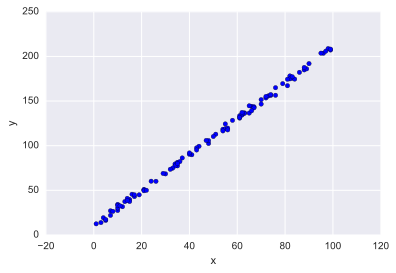

In [56]:
# Plot the points
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.scatter(X,Y)

Initialize $w_0$ and $w_1$ to random values and set gradient descent parameters

In [57]:
# Initialize weight w0, w1
w0 = np.random.randint(0,100)
w1 = np.random.randint(0,100)

# Parameters
n_iter = 1000
step_size = 9e-5
n = X.shape[0]

This part is the heart of the linear regression. We compute $f$ for each data point $x$, compute the gradients and update $w_0$ and $w_1$ (compare the code with the derivations we made in the theory). Finally, we repeat this process for n_iter times and print total loss every 100 iterations.

In [58]:
# Fit a model using stochastic gradient descent
for i in range(n_iter):
    for j in range(n):
        # x and y
        x = X[j]
        y = Y[j]

        # f
        f = fun(w0, w1, x)

        # Compute gradients
        w0_grad = 2 * (f - y)
        w1_grad = 2 * (f - y) * x

        # Update weights using stochastic gradient descent
        w0 += -step_size * w0_grad
        w1 += -step_size * w1_grad

    # Print squared loss every 100 iterations
    if i % 100 == 0:
        loss = np.sum((fun(w0, w1, X) - Y)**2)
        print("Loss: "+str(loss))

Loss: 4955.70188341
Loss: 2261.27133458
Loss: 1210.17403405
Loss: 798.408097907
Loss: 636.028521677
Loss: 571.335335921
Loss: 545.158317136
Loss: 534.322511973
Loss: 529.691911498
Loss: 527.628507887


Yay! The loss kept getting reduced which is a good sign of learning :-) Just to be sure, we plot the fitted line using the optimized $w_0$ and $w_1$.

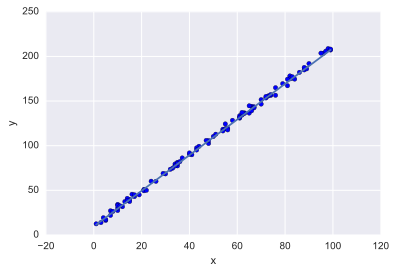

In [59]:
# Plot the predicted line
Y_pred = fun(w0, w1, X)
ax.plot(X,Y_pred)
display(fig)

In [60]:
print("w1="+str(w1)+", w0="+str(w0))

w1=1.9972166942, w0=9.53191086668


From the above figure, it is obvious that the line fits to the data points. More importantly, check the values $w_1$ and $w_0$, they should be close to 2 and 10 respectively (because originally these points are generate using $Y=2X+10$)